In [1]:
# test/check the clustering scripts
import openephys as oe
import numpy as np
import os
import sys
from cluster_spike_plotter import *
from clusterbank_maker import *
import matplotlib.pyplot as plt
import pickle
import time

In [2]:
%matplotlib notebook

In [3]:
home_dir = '/home/tom/d/Recordings/190410/2019-04-10_15-04-49'
#home_dir = '/home/camp/warnert/working/Recordings/190410/2019-04-10_15-04-49'
trial_starts = np.fromfile(os.path.join(home_dir, 'trial_starts.npy'), dtype=np.int)
chan_map = np.load(os.path.join(home_dir, 'channel_map.npy'))

In [4]:
cluster_contam_tsv = csv.reader(open(os.path.join(home_dir, 'cluster_ContamPct.tsv'), 'r'), delimiter='\t')
cluster_amp_tsv = csv.reader(open(os.path.join(home_dir, 'cluster_Amplitude.tsv'), 'r'), delimiter='\t')
cluster_contam_tsv = list(cluster_contam_tsv)
cluster_amp_tsv = list(cluster_amp_tsv)

In [5]:
cluster_contam = {}
cluster_amp = {}
for i, j, k in zip(cluster_contam_tsv[1:], cluster_amp_tsv[1:], cluster_amp_tsv[1:]):
    cluster_contam[int(i[0])] = float(i[1])
    cluster_amp[int(j[0])] = float(j[1])
    print(k)

['0', '1900.9']
['1', '803.0']
['2', '695.8']
['3', '725.6']
['4', '486.8']
['5', '363.9']
['6', '444.3']
['7', '444.1']
['8', '645.8']
['9', '586.6']
['10', '336.5']
['11', '287.9']
['12', '303.4']
['13', '309.4']
['14', '1353.4']
['15', '1077.2']
['16', '291.6']
['17', '486.8']
['18', '1109.3']
['19', '2428.0']
['20', '694.4']
['21', '441.7']
['22', '505.6']
['23', '579.0']
['24', '456.2']
['25', '1414.9']
['26', '3881.5']
['27', '1455.2']
['28', '1002.2']
['29', '1110.5']
['30', '840.3']
['31', '913.3']
['32', '1093.6']
['33', '893.9']
['34', '850.2']
['35', '1237.7']
['36', '588.8']
['37', '654.0']
['38', '367.8']
['39', '509.3']
['40', '531.9']
['41', '634.1']
['42', '379.5']
['43', '652.4']
['44', '532.6']
['45', '775.5']
['46', '548.0']
['47', '673.6']
['48', '891.8']
['49', '353.4']
['50', '475.4']
['51', '331.2']
['52', '473.9']
['53', '926.7']
['54', '617.1']
['55', '564.9']
['56', '214.6']
['57', '604.6']
['58', '249.3']
['59', '431.1']
['60', '284.9']
['61', '489.8']
['62',

In [10]:
amps, max_cluster_chan = find_amplitudes(os.path.join(home_dir, '100_CHs.dat'), 64, clusterbank['good_units'][0]['times'])

In [6]:
clusterbank  = make_clusterbank_basic(home_dir, dump=False, kilosort2=True)

In [ ]:
clusterbank_full = make_clusterbank_full(home_dir, 64,  dump=False, kilosort2=True)

Done making basic clusterbank
Doing good_units units now
Doing cluster 0.0
Finding amps
Doing cluster 6.0
Finding amps
Doing cluster 8.0
Finding amps
Doing cluster 9.0
Finding amps
Doing cluster 14.0
Finding amps
Doing cluster 15.0
Finding amps
Doing cluster 16.0
Finding amps
Doing cluster 17.0
Finding amps
Doing cluster 18.0
Finding amps
Doing cluster 19.0
Finding amps
Doing cluster 22.0
Finding amps
Doing cluster 25.0
Finding amps
Doing cluster 26.0
Finding amps


In [8]:
print(clusterbank['good_units'][0])

{'KScontamination': 0.7, 'KSamplitude': 1900.9, 'KSlabel': 'good', 'unique_temps_ids': array([0], dtype=uint32), 'times': array([[     1336],
       [     1970],
       [     2435],
       ...,
       [145058479],
       [145060701],
       [145061932]], dtype=uint64), 'template_ids': array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint32), 'templates': array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.00585945, 0.00583542, 0.00087437, ..., 0.        ,
         0.        , 0.        ],
        [0.00428344, 0.00452195, 0.00077882, ..., 0.        ,
         0.        , 0.        ],
        [0.00532101, 0.00562329, 0.00061894, ..., 0.        ,
         0.        , 0.        ]]], dtype=floa

In [11]:
datas = [oe.loadContinuous2(os.path.join(home_dir, '100_CH%d.continuous' % i))['data'] for i in range(1, 65)]

KeyboardInterrupt: 

In [9]:
x, cluster_spikes = find_cluster_spikes(data2, clusterbank['good_units'][0]['times'])

In [9]:
data = oe.loadContinuous2(os.path.join(home_dir, '100_CH33.continuous'))['data']
print(clusterbank['good_units'][0])

{'contamination': 0.7, 'amplitude': 1900.9, 'max_chan': 1, 'file_max': 58, 'KSlabel': 'good', 'unique_temps_ids': array([0], dtype=uint32), 'times': array([[     1336],
       [     1970],
       [     2435],
       ...,
       [145058479],
       [145060701],
       [145061932]], dtype=uint64), 'template_ids': array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint32), 'templates': array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.00585945, 0.00583542, 0.00087437, ..., 0.        ,
         0.        , 0.        ],
        [0.00428344, 0.00452195, 0.00077882, ..., 0.        ,
         0.        , 0.        ],
        [0.00532101, 0.00562329, 0.00061894, ..., 0.        ,
         0.        

In [7]:
print(clusterbank['good_units'][0]['times'])

[[ 45437111]
 [ 74195884]
 [ 74632500]
 ...
 [143711613]
 [143724275]
 [143747298]]


In [8]:
x, cluster_spikes = find_cluster_spikes(data, clusterbank['good_units'][0]['times'])

In [33]:
datas = [oe.loadContinuous2(os.path.join(home_dir, '100_CH%d.continuous' % i))['data'] for i in range(1, 65)]

In [17]:
cluster_datas = [find_cluster_spikes(i, clusterbank['good_units'][0]['times'])[1] for i in datas]

In [20]:
cluster_means = [np.mean(i, axis=0) for i in cluster_datas]
cluster_means = np.array(cluster_means)

<IPython.core.display.Javascript object>


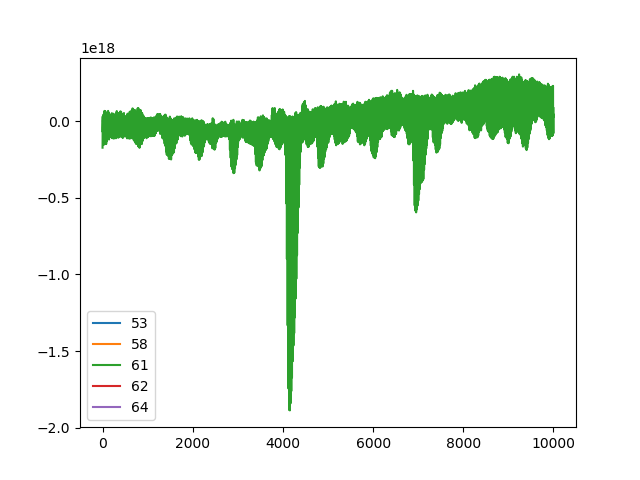

57
2
1
62
63


In [35]:
for index, i in enumerate(cluster_means):
    if min(i) < -200:
        plt.plot(i, label=index+1)
        print(m_chan_map.index(index+1))
plt.legend()

In [42]:
for index,i in enumerate(chan_map):
    if i == 52:
        print(index)
print(chan_map[52])

52
[52]


In [11]:
dat_file = np.memmap(os.path.join(home_dir, '100_CHs.dat'), dtype=np.int16)

In [15]:
time_length = int(len(dat_file)/64)
print(time_length)

145200128


In [17]:
dat_file = dat_file.reshape((64, time_length), order='F')

In [18]:
print(dat_file.shape)

(64, 145200128)


In [29]:
cluster_spikes = []
for i in range(64):
    dat_file[:, int(i-30):int(i+60)] for i in clusterbank['good_units'][0]['times']]


In [7]:
test_datas = oe.loadFolderToArrayFast(home_dir)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
Avg. Load Time: 3.078698296099901 sec
Total Load Time: 197.03671956062317 sec


In [6]:
chan_list = range(1, 65)
file_name = '100_CH'
datas = [oe.loadContinuous2(os.path.join(home_dir, file_name+'%d.continuous' % i))['data'] for i in chan_list]


In [7]:
x, cluster_spikes= 

145200128


In [11]:
cluster_spikes_all = []
for i in range(64):
    print(i)
    cluster_spikes_all.append(np.mean(find_cluster_spikes(dat_file[i], clusterbank['good_units'][0]['times'])[1], axis=0))
    print(i)

0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17
18
18
19
19
20
20
21
21
22
22
23
23
24
24
25
25
26
26
27
27
28
28
29
29
30
30
31
31
32
32
33
33
34
34
35
35
36
36
37
37
38
38
39
39
40
40
41
41
42
42
43
43
44
44
45
45
46
46
47
47
48
48
49
49
50
50
51
51
52
52
53
53
54
54
55
55
56
56
57
57
58
58
59
59
60
60
61
61
62
62
63
63


52 -1811.6213557333938
-2113.098189454566


<IPython.core.display.Javascript object>


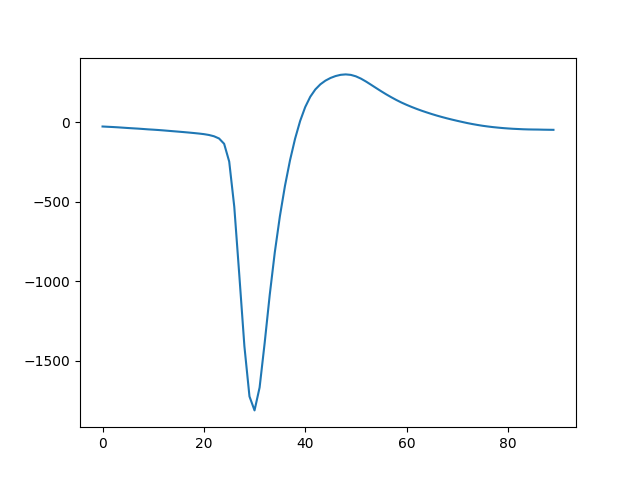

In [12]:
mins = [min(i) for i in cluster_spikes_all]
print(np.argmin(mins), min(mins))
print(min(cluster_spikes_all[52])-max(cluster_spikes_all[52]))
plt.plot(cluster_spikes_all[np.argmin(mins)])


In [49]:
spike_to_time = 176/52857
times = []
for i in clusterbank['good_units']:
    print(i, len(clusterbank['good_units'][i]['times'])*spike_to_time)
    times.append(len(clusterbank['good_units'][i]['times'])*spike_to_time)
print(sum(times)/60)

0.0 176.0
6.0 13.388879429403863
8.0 213.15988421590328
9.0 73.42406871369923
14.0 107.05775961556652
15.0 172.89668350455003
16.0 131.94422687628887
17.0 5.587301587301587
18.0 165.05847853642848
19.0 493.67705318122484
22.0 26.111811113003007
25.0 482.0262973683713
26.0 275.75231284408875
28.0 222.3932497114857
30.0 35.18867888832132
32.0 79.07463533685227
34.0 0.8657320695461339
38.0 7.002440547136614
43.0 399.282289952135
45.0 117.14020848704996
53.0 401.91611328679267
74.0 151.76949126889534
76.0 179.8258697996481
77.0 92.39359025294662
78.0 249.04780823731957
80.0 183.44196605936773
88.0 95.77327506290558
89.0 140.24526552774466
92.0 12.419925459257998
93.0 396.21560058270427
94.0 255.46754450687706
98.0 275.59248538509564
106.0 6.35980097243506
110.0 470.6752180411298
111.0 152.83500766218287
112.0 4.188811321111679
113.0 89.52002572979927
114.0 108.83584009686513
115.0 168.9143159846378
116.0 488.0298162968008
119.0 59.05624609796243
126.0 175.53050683920767
127.0 18.4567417749

In [14]:
cluster_spikes = np.array(cluster_spikes)
print(cluster_spikes.shape)

(52857, 64, 90)


In [26]:
plt.plot( dat_file[:, 10:20]- np.array([np.median(dat_file[:, 10:20],axis=1) for i in range(10)]).T)

[[ -18.5   -6.5   13.5   -2.5    2.5  -61.5   -2.5   65.5   33.5   50.5]
 [   5.    43.     6.   -36.    -5.   -33.   -28.    68.    48.   -16. ]
 [ -11.5    1.5  -49.5  -46.5    2.5   22.5   10.5   22.5   -1.5   -6.5]
 [  17.5   72.5   16.5  -15.5  -14.5  -26.5   20.5  -22.5   14.5  -17.5]
 [-125.5  -85.5  -81.5  -55.5  -21.5   55.5   61.5   21.5   53.5   82.5]
 [ -48.   -40.   -86.   -46.    20.    10.    33.    13.    10.   -10. ]
 [ -20.   -12.   -48.    -8.     5.     0.     0.    43.   102.   141. ]
 [ -14.5   -7.5  -13.5  -40.5  -45.5    7.5   64.5   27.5   24.5   18.5]
 [ -44.   -22.   -21.   -17.   -21.    17.    47.    92.   122.   124. ]
 [ -32.5  -11.5   -0.5  -21.5    0.5   50.5   50.5   71.5   63.5   -0.5]
 [  10.    31.    47.   -49.   -67.   -44.    50.    21.   -10.   -53. ]
 [  -0.5   -1.5   -3.5  -58.5    0.5   -4.5   20.5   44.5   60.5   25.5]
 [   2.   -10.    -2.   -55.   -34.    25.    20.    20.    -2.     9. ]
 [  33.5  -31.5   23.5   24.5  -36.5  -20.5   -4.5 

<IPython.core.display.Javascript object>


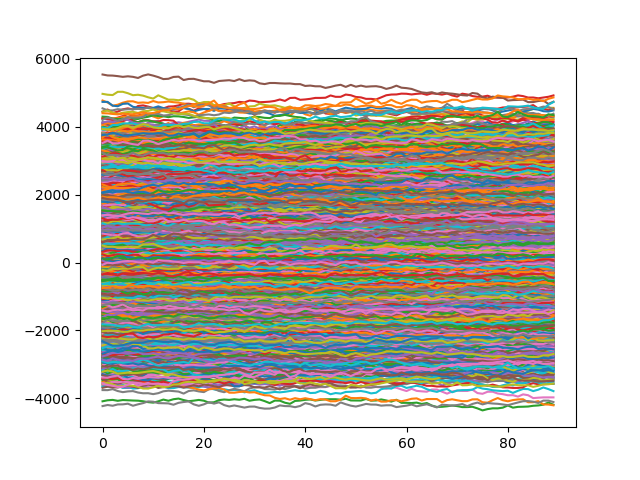

 ...]

In [16]:
plt.plot(cluster_spikes[:, 0, :].T)

In [19]:
test_chan = oe.loadContinuous2(os.path.join(home_dir, '100_CH33.continuous'))

<IPython.core.display.Javascript object>


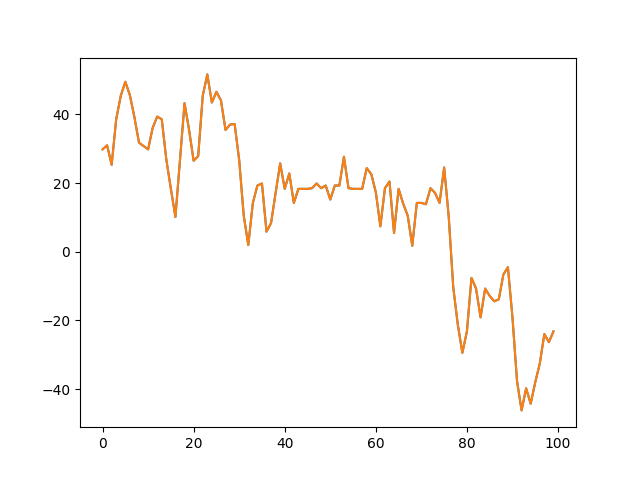

In [22]:
plt.plot(dat_file[32][:100]*0.195)
plt.plot(test_chan['data'][:100])

In [14]:
print(dat_file.shape)

(64, 145200128)


In [33]:
check = []
for i in m_chan_map:
    if i in check:
        print('whoops')
    else:
        check.append(i)

In [53]:
plt.plot(x, cluster_means[57])
plt.plot(x, np.mean(cluster_spikes, axis=0))

<IPython.core.display.Javascript object>


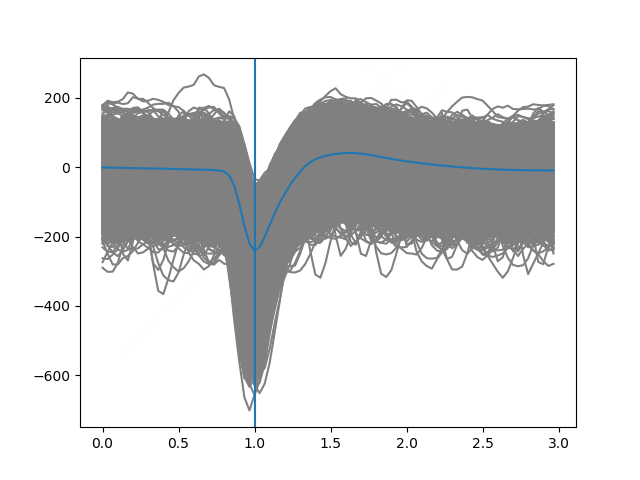

In [10]:
plt.plot(x, cluster_spikes.T, color='gray')
plt.plot(x, np.mean(cluster_spikes, axis=0))
plt.axvline(x[30])

In [10]:
amps = [-i[30] for i in cluster_spikes]
times = clusterbank['good_units'][0]['times']

<IPython.core.display.Javascript object>


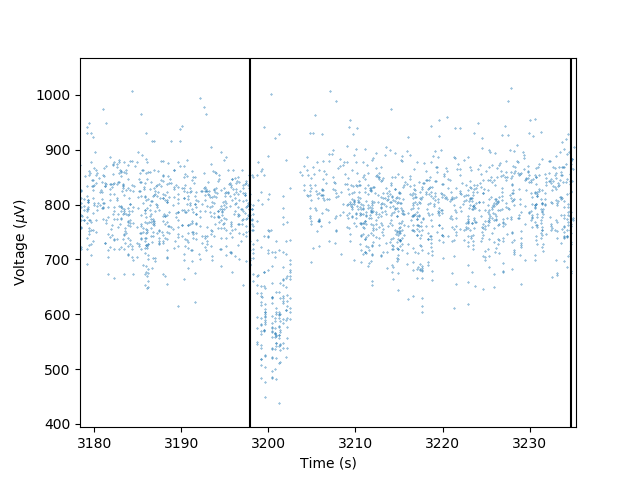

Text(0.5,0,'Time (s)')

In [42]:
plt.scatter(clusterbank['good_units'][0]['times']/30000, amps, s=0.1, )
for i in trial_starts:
    plt.axvline(i/30000, color='k')
plt.ylabel('Voltage ($\mu$V)')
plt.xlabel('Time (s)')

In [12]:
trial_length = 5
fs=30000
trial_amps = []
times = np.array(times)
amps = np.array(amps)
for i in trial_starts:
    init= i- trial_length*fs
    end = i+2*trial_length*fs
    in_trial = ((times > int(init)) & (times<int(end))).flatten()   
    print(len(in_trial))
#     for index, j in enumerate(in_trial):
#         if j:
#             print(index)
#             print(init, end)
#             break
    spike_amps = amps[((times > int(init)) & (times<int(end))).flatten()]
    print(spike_amps)
    trial_amps.append(spike_amps)

59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[]
59194
[531.57]
59194
[519.9675 550.68   664.0725 496.7625 474.3375]
59194
[494.91   499.2975]
59194
[592.995  523.185  573.3975 514.215  646.815  600.6    548.73   555.4575
 535.47   533.2275 521.625  528.9375 679.6725 596.7    551.3625 581.5875
 537.615  565.89   526.7925 524.4525 516.8475 539.4675 531.6675 513.5325
 641.94   524.16   563.8425 520.65   544.7325 490.23   592.605  573.3
 548.34   520.065  569.692

[ 956.085   948.5775  867.945   939.6075  814.0275  865.02    879.1575
  885.0075  801.255   890.76    779.1225  927.7125  792.3825  940.5825
  955.0125  849.5175  890.955   894.075   840.255   817.05    767.6175
  824.9475  859.4625  900.6075  938.145   910.26    875.94    935.025
  843.2775  849.225   801.9375  770.5425  832.7475  899.2425  815.295
  810.42    903.435   860.6325  906.945   818.7075  763.9125  934.7325
  857.1225  993.6225  873.21    828.165   901.875   910.9425  900.6075
  870.48    943.605   859.365   815.9775  918.45    949.065   936.195
  898.56    900.9     853.125   932.3925  957.255   883.935   815.9775
 1023.4575  950.625   941.3625  936.0975  986.31    863.85    862.68
  798.6225  897.4875  764.3025  865.1175  936.6825  899.0475  981.5325
  901.1925  785.265   905.0925  970.905  1031.6475  919.035   897.585
  876.72    842.79    898.56    887.25    848.9325  827.2875  918.84
  872.235   840.06    868.4325 1041.2025  885.9825  947.6025 1101.4575
  845.0325  95

In [13]:
trial_amps = np.array(trial_amps)

In [14]:
print(trial_amps.shape)

(124,)


In [15]:
print(trial_amps[3])

[]


In [17]:
trial_spike_times = find_trial_spike_times(trial_starts, clusterbank['good_units'][0]['times'])

In [22]:
print(len(trial_spike_times))
print(len(trial_amps))
for i, j in zip(trial_spike_times, trial_amps):
    print(len(i), len(j))

124
124
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
5 5
2 2
40 40
181 181
218 218
267 267
327 327
370 370
331 331
483 483
596 596
445 445
522 522
378 378
427 427
396 396
487 487
525 525
480 480
604 604
613 613
522 522
531 531
506 506
603 603
657 657
438 438
467 467
488 488
535 535
495 495
641 641
553 553
461 461
404 404
557 557
390 390
339 339
403 403
369 369
420 420
357 357
372 372
383 383
348 348
316 316
351 351
302 302
305 305
363 363
318 318
354 354
314 314
398 398
326 326
390 390
377 377
306 306


/home/camp/warnert/.conda/envs/jupyter/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/camp/warnert/.conda/envs/jupyter/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


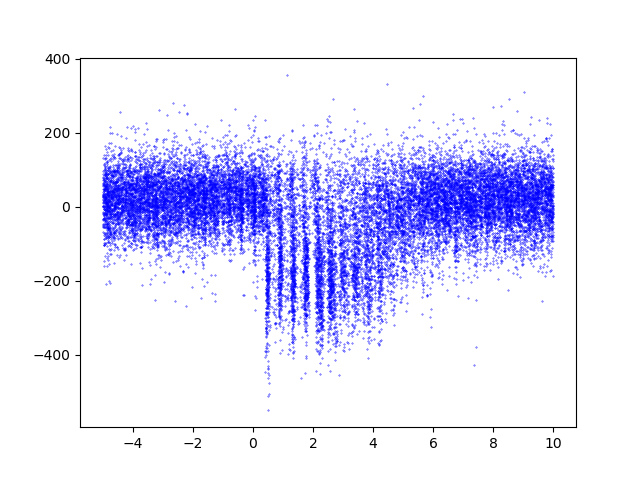

In [26]:
for i, j in zip(trial_spike_times, trial_amps):
    normed_amps = j - np.median(j)
    plt.scatter(i, normed_amps, color='b', s=0.1)

In [28]:
resp = oe.loadContinuous2(os.path.join(home_dir, '100_ADC1.continuous'))['data']

<IPython.core.display.Javascript object>


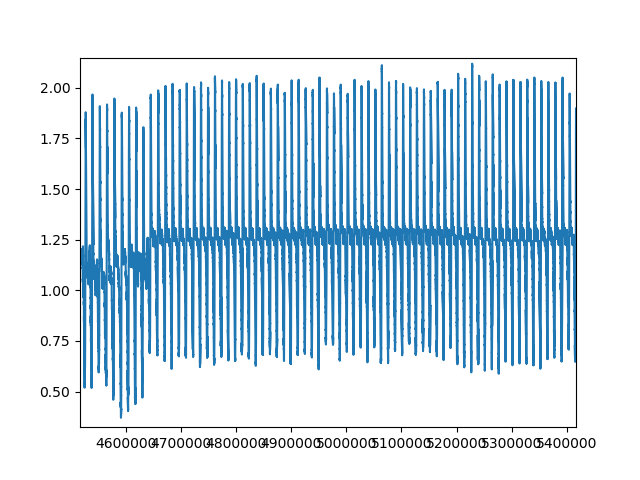

In [29]:
plt.plot(resp)

In [33]:
trial_resps = [resp[i - trial_length*fs: i + 2*trial_length*fs] for i in trial_starts]
trial_resps = np.array(trial_resps)

<IPython.core.display.Javascript object>


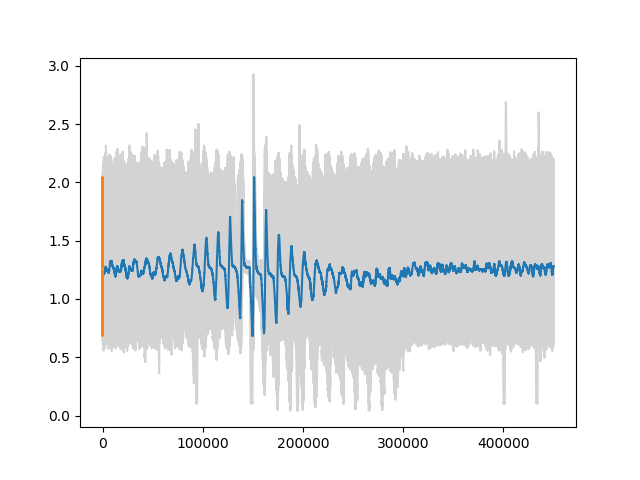

In [36]:
plt.plot(trial_resps.T, color='lightgray')
plt.plot(np.mean(trial_resps, axis=0))
    

In [38]:
resp_x = np.arange(-5, 10, 1/30000)

<IPython.core.display.Javascript object>


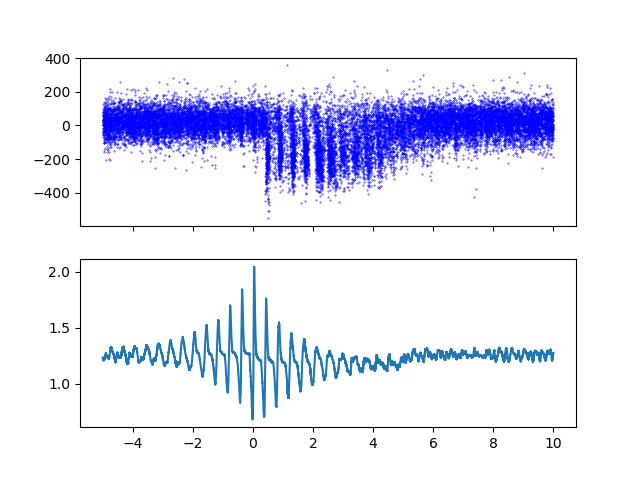

/home/camp/warnert/.conda/envs/jupyter/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/camp/warnert/.conda/envs/jupyter/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [41]:
fig, ax = plt.subplots(2, sharex=True)
for i, j in zip(trial_spike_times, trial_amps):
    normed_amps = j - np.median(j)
    ax[0].scatter(i, normed_amps, color='b', s=0.1)
ax[1].plot(resp_x, np.mean(trial_resps, axis=0))

In [ ]:
pre_trial_times = []